Analyse exploratoire des données (EDA complète attendue) Vous devez aller au-delà de quelques graphiques

- Analyse univariée (distributions, asymétrie, outliers)
- Analyse bivariée/multivariée (relations, interactions)
- Analyse de la cible (lien entre les features et la target)
- Corrélation/association (selon le type de variables)
- Visualisations avec interprétation (pas seulement des figures)
- Section « insights » claire : ce que vous avez appris et comment cela a influencé la modélisation


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/processed/adult_cleaned.csv')

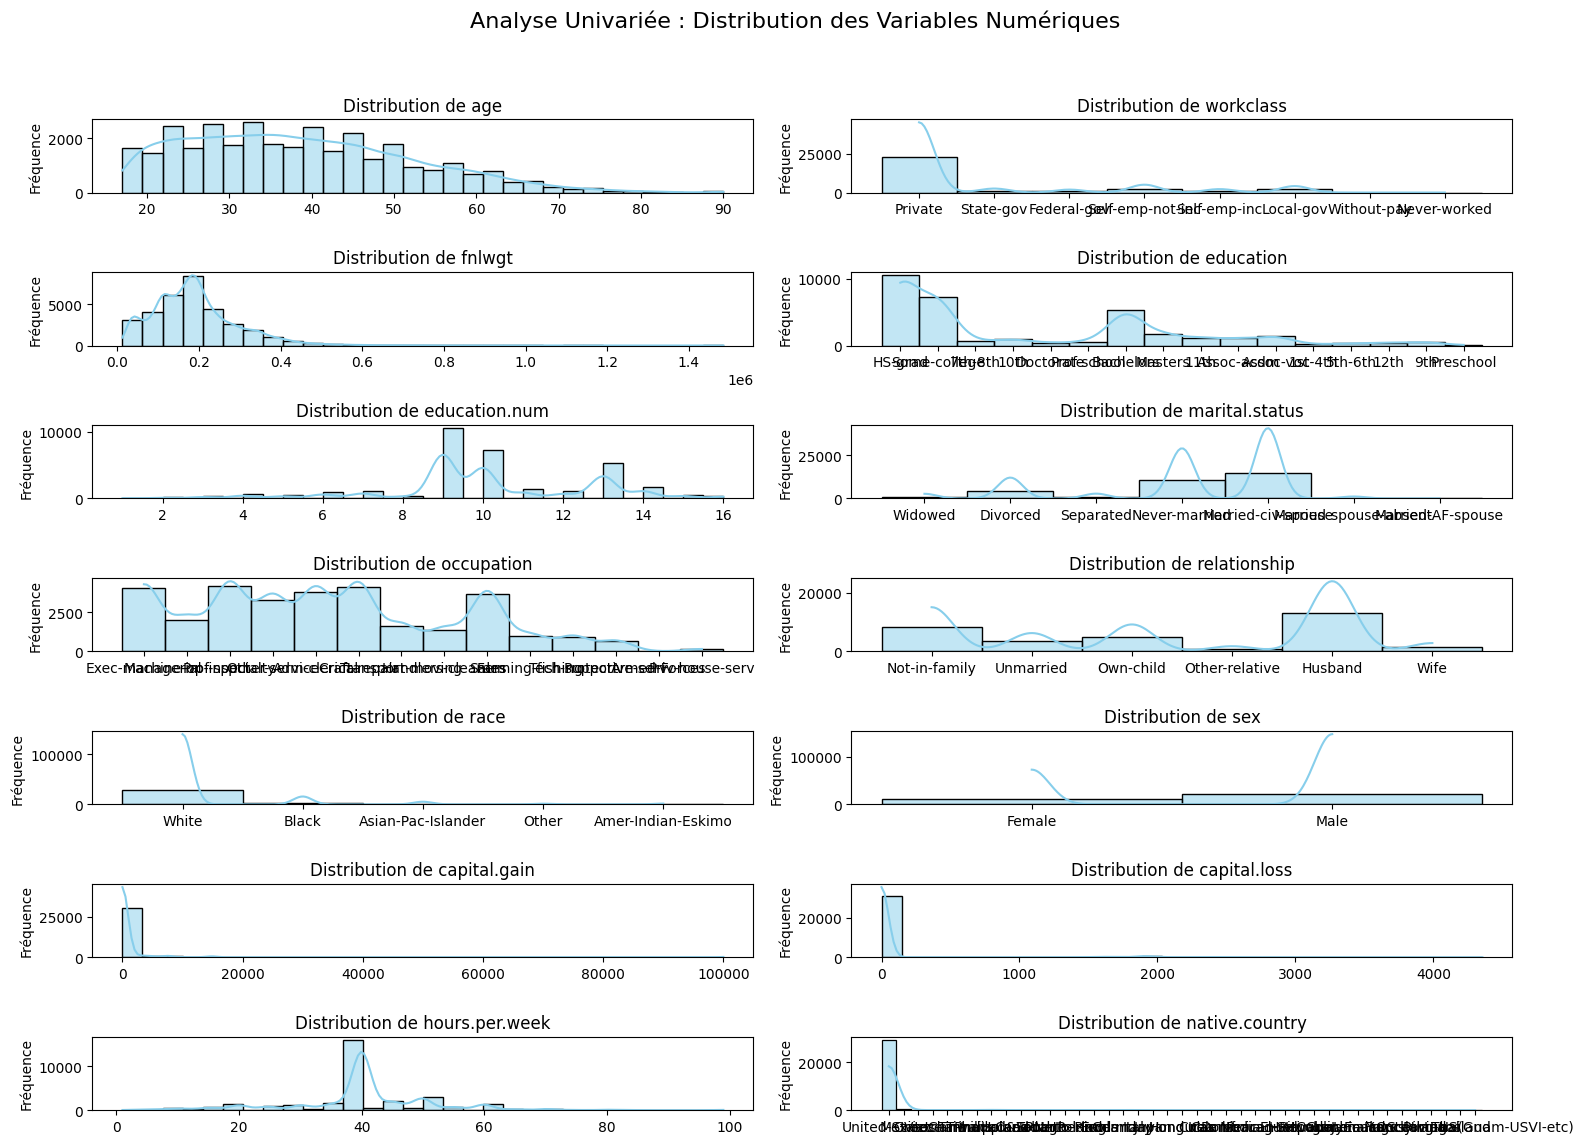

--- Analyse de l'asymétrie (Skewness) ---
age: 0.56
fnlwgt: 1.45
education.num: -0.31
capital.gain: 11.95
capital.loss: 4.59
hours.per.week: 0.23


In [3]:
cols_num = [
    'age', 'workclass', 'fnlwgt', 'education', 'education.num', 
    'marital.status', 'occupation', 'relationship', 'race', 'sex', 
    'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
]

plt.figure(figsize=(16, 12))
plt.suptitle("Analyse Univariée : Distribution des Variables Numériques", fontsize=16)

for i, col in enumerate(cols_num, 1):
    plt.subplot(7, 2, i)
    
    data_to_plot = df[col].dropna()
    
    if col in ['capital-gain', 'capital-loss']:
        sns.histplot(data_to_plot, bins=50, color='orange')
        plt.yscale('log') # Échelle logarithmique car beaucoup de zéros
        plt.title(f'Distribution de {col} (Échelle Log)')
    else:
        sns.histplot(data_to_plot, kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution de {col}')
    
    plt.xlabel('')
    plt.ylabel('Fréquence')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("--- Analyse de l'asymétrie (Skewness) ---")
for col in [
    'age', 
    'fnlwgt', 
    'education.num', 
    'capital.gain', 
    'capital.loss', 
    'hours.per.week'
]:
    print(f"{col}: {df[col].skew():.2f}")

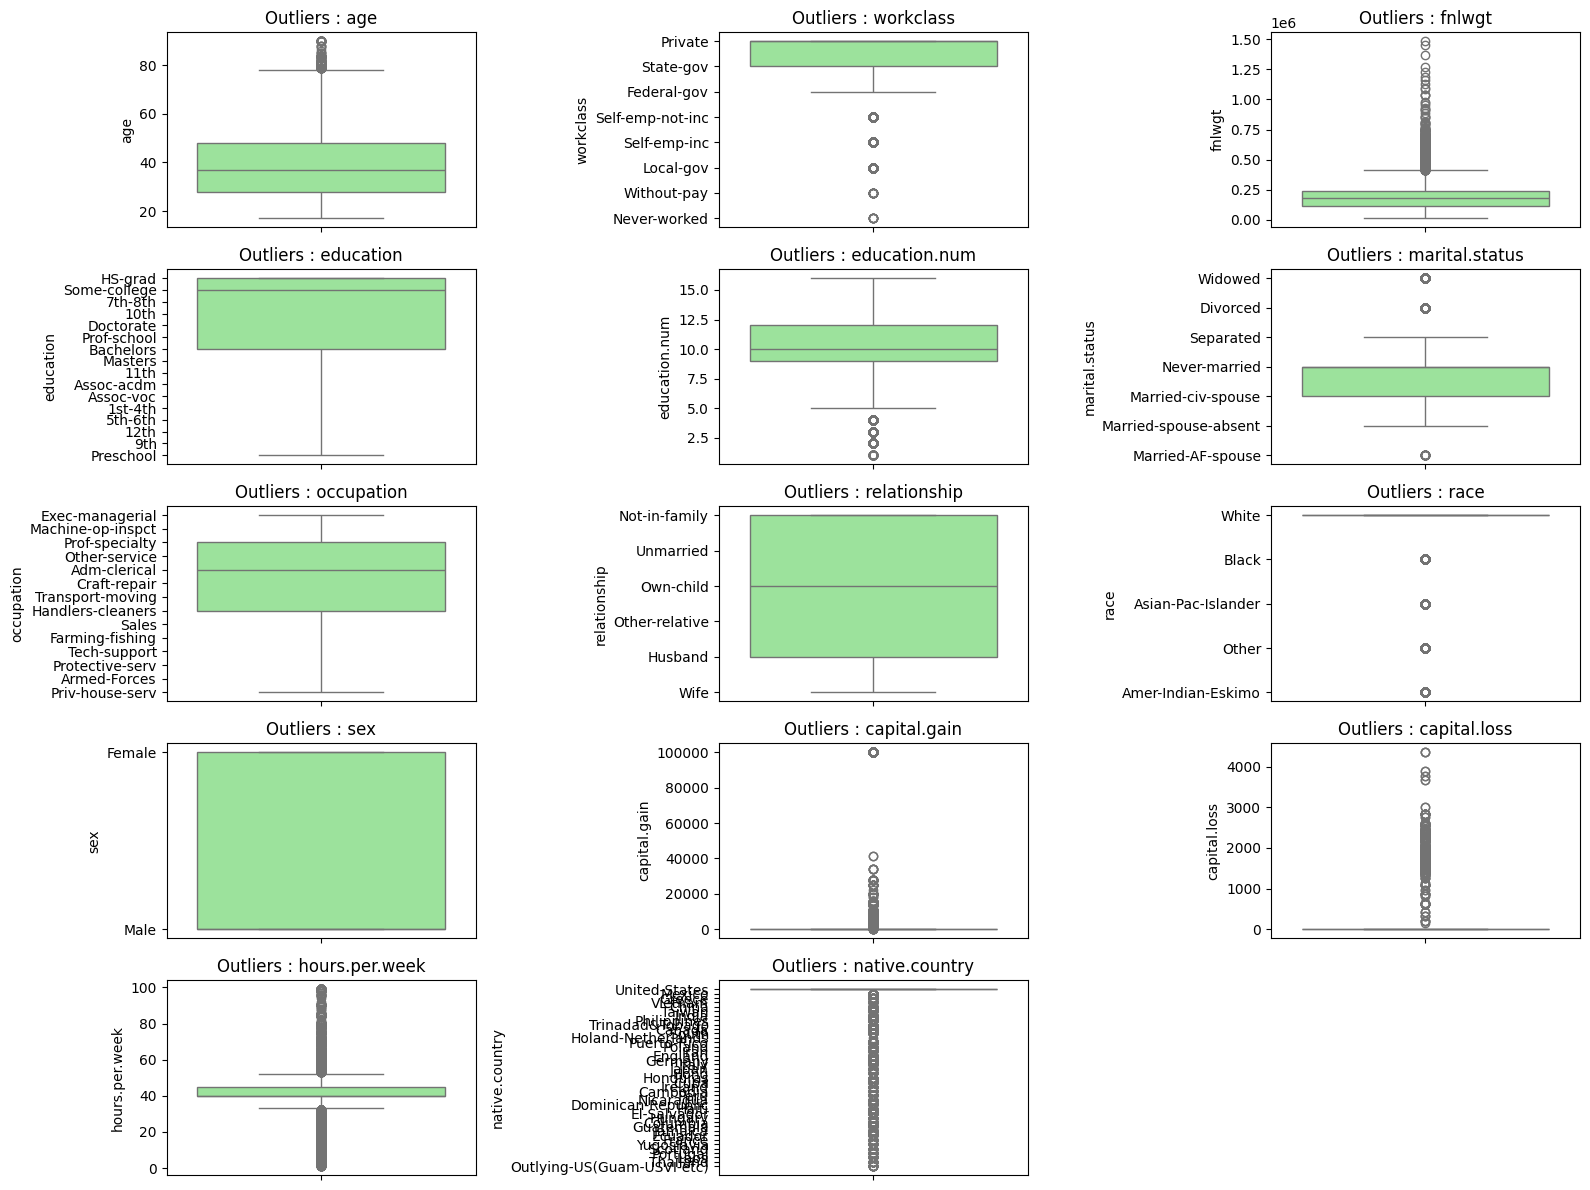

In [4]:
#Outliers

plt.figure(figsize=(16, 12))
for i, col in enumerate([
    'age', 'workclass', 'fnlwgt', 'education', 'education.num', 
    'marital.status', 'occupation', 'relationship', 'race', 'sex', 
    'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'
], 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Outliers : {col}')
plt.tight_layout()
plt.show()

## Analyse Bivariée et multivariée 

C:\Users\matth\AppData\Local\Temp\ipykernel_5032\437885448.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=col, data=df, palette='viridis')
C:\Users\matth\AppData\Local\Temp\ipykernel_5032\437885448.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=col, data=df, palette='viridis')
C:\Users\matth\AppData\Local\Temp\ipykernel_5032\437885448.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=col, data=df, palette='viridis')


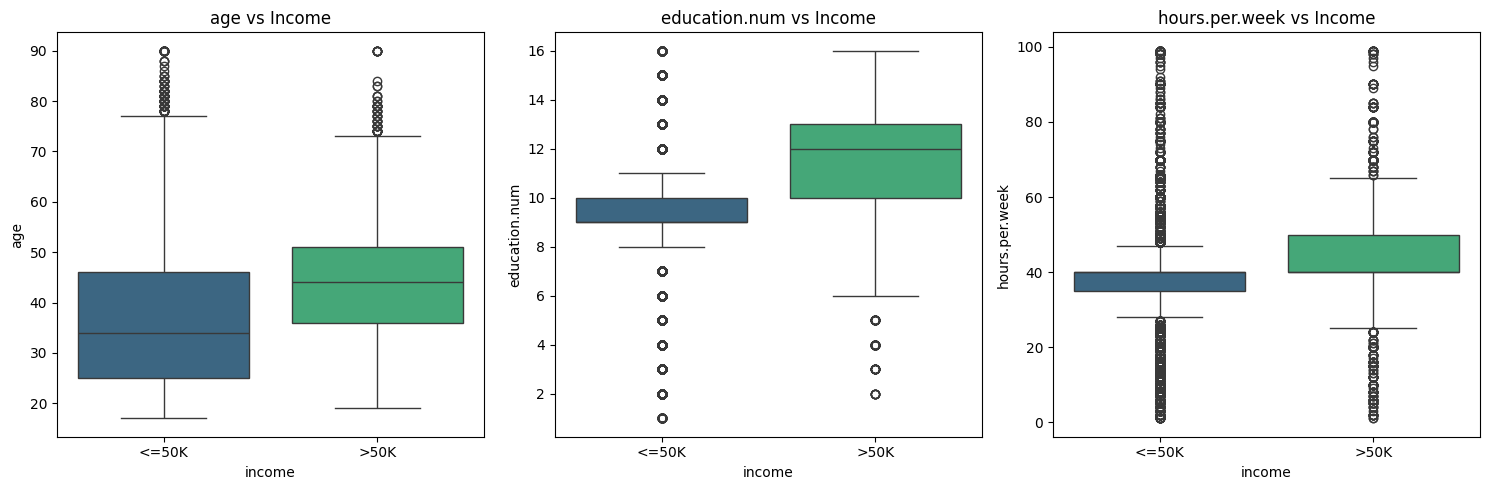

In [7]:
num_features = ['age', 'education.num', 'hours.per.week']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='income', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs Income')

plt.tight_layout()
plt.show()

1.
Le premier graphique montre que le revenu a tendance à augmenter avec l'âge. On observe que la majorité des personnes gagnant plus de 50k sont plus matures, avec une médiane située autour de 45 ans, alors que les revenus plus modestes se concentrent chez les profils plus jeunes. Les nombreux points isolés vers le haut indiquent toutefois que certains seniors continuent de travailler bien au-delà de l'âge classique de la retraite.

2.
Le graphique central souligne que le niveau d'éducation (education.num) est un levier majeur pour accéder à de hauts revenus. Il existe une rupture nette : la plupart des personnes dépassant les 50k ont un score d'éducation supérieur à 12, ce qui correspond à des études supérieures. À l'inverse, ceux qui ont un niveau scolaire plus faible (autour de 9-10) restent majoritairement dans la tranche de revenus inférieure.

3.
Enfin, le dernier graphique illustre la relation entre le temps de travail et le salaire. Si la norme des 40 heures par semaine est très forte pour tout le monde, on remarque que les hauts revenus travaillent souvent davantage, avec une boîte qui s'étire vers les 45-50 heures. Les revenus plus faibles présentent, quant à eux, beaucoup plus de cas de travail à temps partiel, visibles par la densité de points sous la barre des 20 heures.

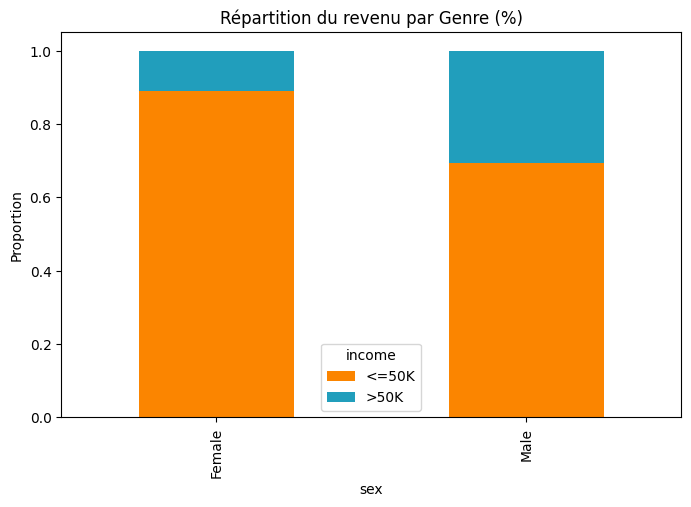

In [9]:
# Relation Genre vs Revenu (en pourcentage pour éviter le biais d'effectif)
df_gender = df.groupby(['sex', 'income']).size().unstack()
df_gender_pct = df_gender.div(df_gender.sum(axis=1), axis=0)

df_gender_pct.plot(kind='bar', stacked=True, figsize=(8, 5), color=['#fb8500', '#219ebc'])
plt.title('Répartition du revenu par Genre (%)')
plt.ylabel('Proportion')
plt.show()

Ce diagramme en barres montre le déséquilibre des classes au sein de chaque genre. On constate visuellement que la proportion d'hommes atteignant la tranche >50K est nettement supérieure à celle des femmes (environ 30% contre 10% environ). C'est un insight crucial : le "Genre" est une variable qui risque d'avoir un poids important dans ton futur modèle de prédiction pour séparer les deux classes de revenus.

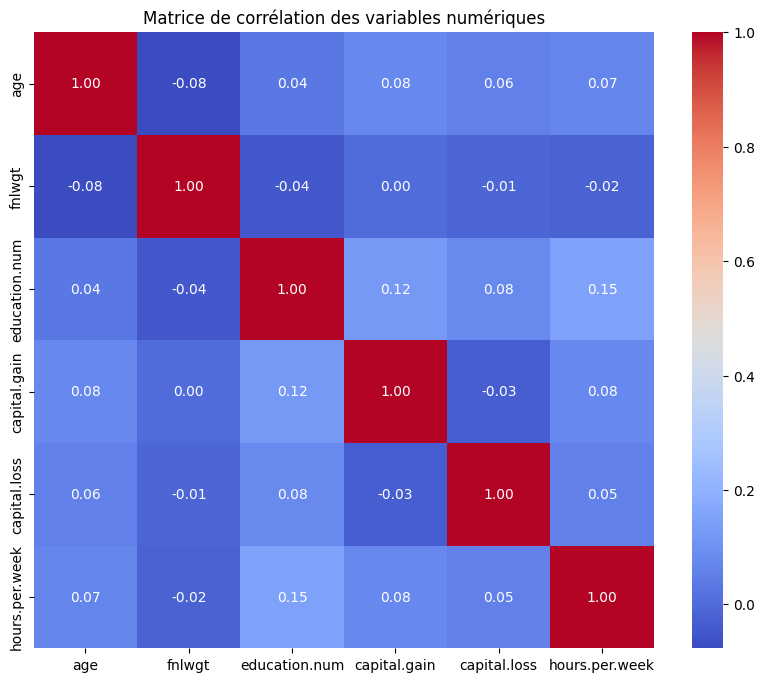

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

Ici, on regarde si les variables "bougent" ensemble. On remarque que les corrélations directes entre les variables numériques (comme l'âge et le niveau d'éducation) sont assez faibles (souvent proches de 0 ou 0.15). Cela signifie qu'il n'y a pas de redondance majeure entre tes chiffres : chaque variable apporte une information unique au modèle. Par exemple, être âgé ne garantit pas automatiquement d'avoir un haut niveau d'études dans ce dataset.

C:\Users\matth\AppData\Local\Temp\ipykernel_5032\2344913428.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='sex', y='hours.per.week', hue='income', data=df, join=False, dodge=True, palette='magma')


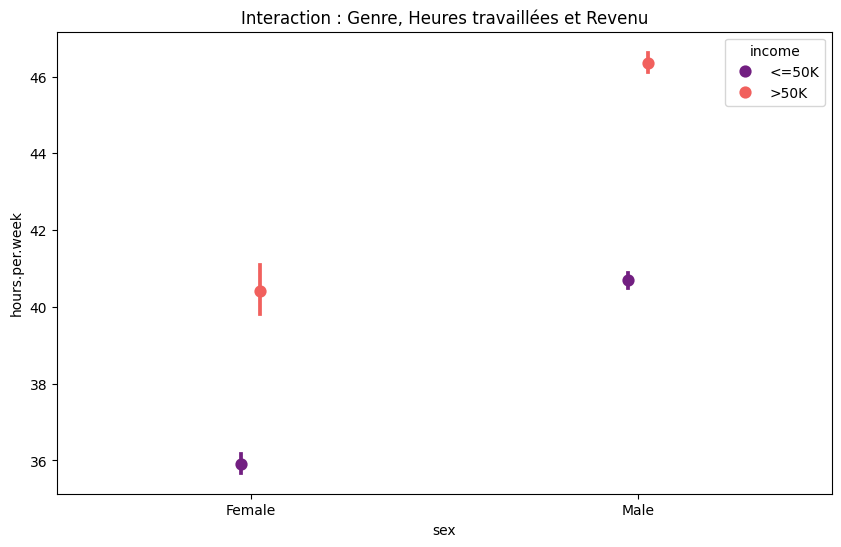

In [12]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='sex', y='hours.per.week', hue='income', data=df, join=False, dodge=True, palette='magma')
plt.title('Interaction : Genre, Heures travaillées et Revenu')
plt.show()

Ce graphique est très révélateur sur les dynamiques sociales du dataset. On y voit que, quel que soit le genre, ceux qui gagnent plus de 50k (>50K) travaillent en moyenne nettement plus d'heures par semaine que les autres. Cependant, on observe un écart marqué entre les sexes : les hommes à hauts revenus culminent en moyenne à plus de 46 heures, tandis que les femmes de la même catégorie de revenus se situent juste au-dessus de 40 heures. Cela suggère que l'accès aux hauts revenus ne dépend pas uniquement du volume horaire de la même manière pour tous.

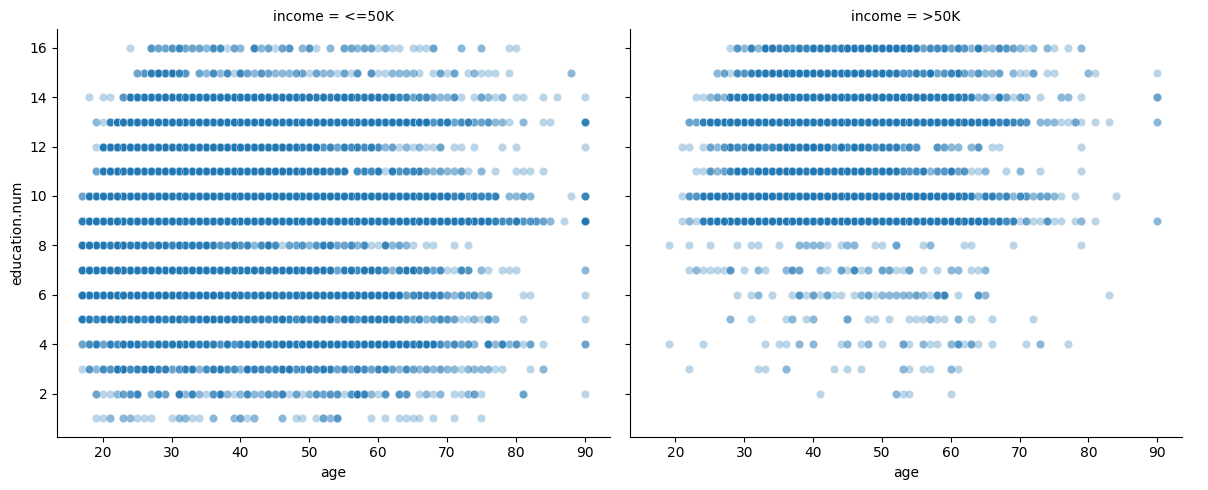

In [14]:
g = sns.FacetGrid(df, col="income", height=5, aspect=1.2)
g.map(sns.scatterplot, "age", "education.num", alpha=0.3)
g.add_legend()
plt.show()

Ces deux graphiques (FacetGrid) montrent la densité des individus. On voit que pour le groupe <=50K (à gauche), les points sont très étalés sur tous les âges et tous les niveaux d'éducation. En revanche, pour le groupe >50K (à droite), on observe une forte concentration (points plus sombres) dans la zone "40-60 ans" avec un niveau d'éducation élevé (au-dessus de 10). Cela confirme que le "succès financier" dans ce recensement est souvent le résultat de la combinaison entre maturité et diplômes.

## Analyse de la cible (lien entre les features et la target)

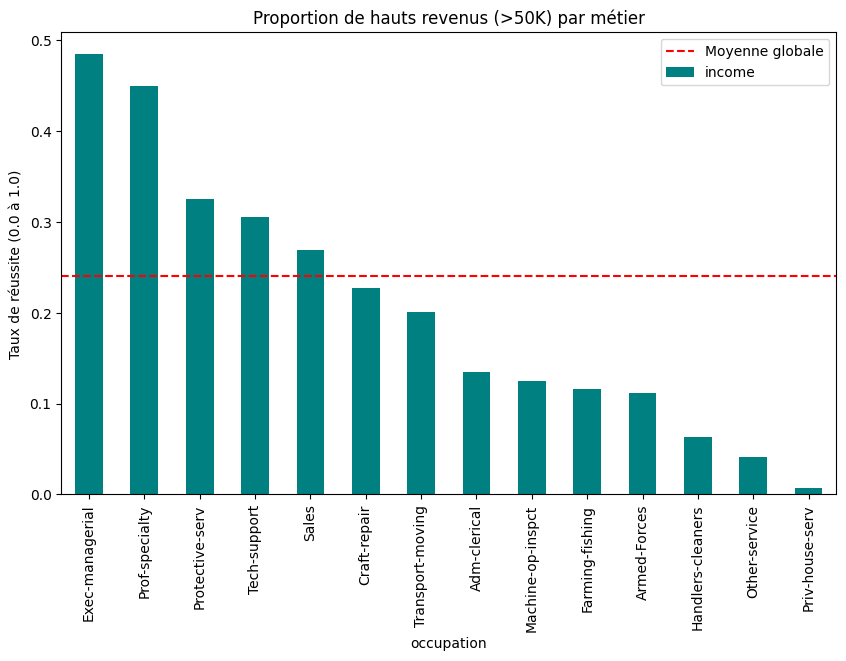

In [15]:
# Calcul du % de personnes gagnant >50K par métier
occupation_income = df.groupby('occupation')['income'].apply(lambda x: (x == '>50K').mean()).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
occupation_income.plot(kind='bar', color='teal')
plt.title('Proportion de hauts revenus (>50K) par métier')
plt.ylabel('Taux de réussite (0.0 à 1.0)')
plt.axhline(y=0.24, color='red', linestyle='--', label='Moyenne globale')
plt.legend()
plt.show()

Sur le diagramme en barre au dessus on peut voir que les métiers qui rapporte le plus par rapport à notre moyenne sont Exec-managerial, Prof speciality et protective serv. 

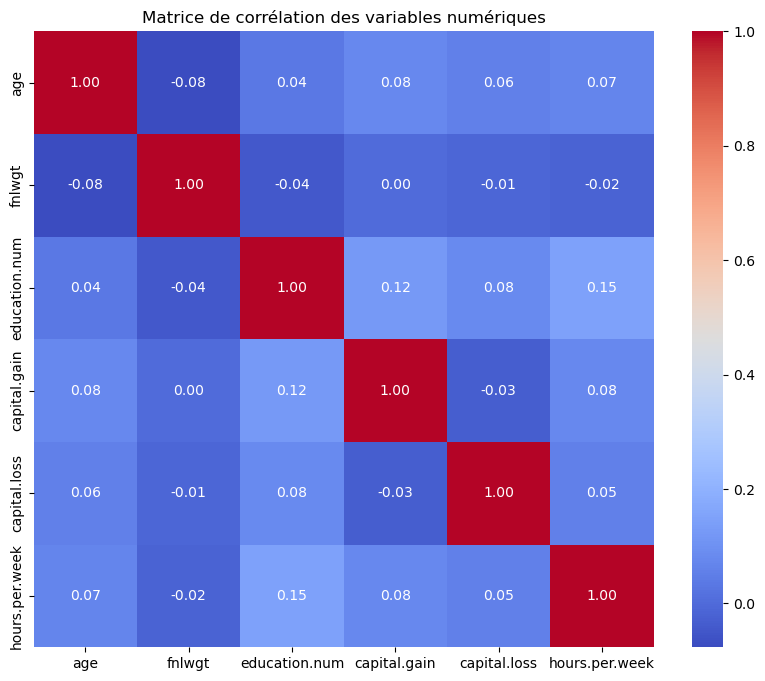

In [4]:
num_cols = df.select_dtypes(include="number").columns

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables numériques")
plt.show()

### Corrélation entre variables numériques

La matrice de corrélation montre que certaines variables sont faiblement corrélées
entre elles. Par exemple, `education.num` présente une corrélation positive modérée
avec `hours.per.week`, ce qui suggère que les individus plus diplômés ont tendance
à travailler légèrement plus d’heures.

Aucune corrélation extrêmement forte n’est observée, ce qui limite les risques
de multicolinéarité pour la modélisation.

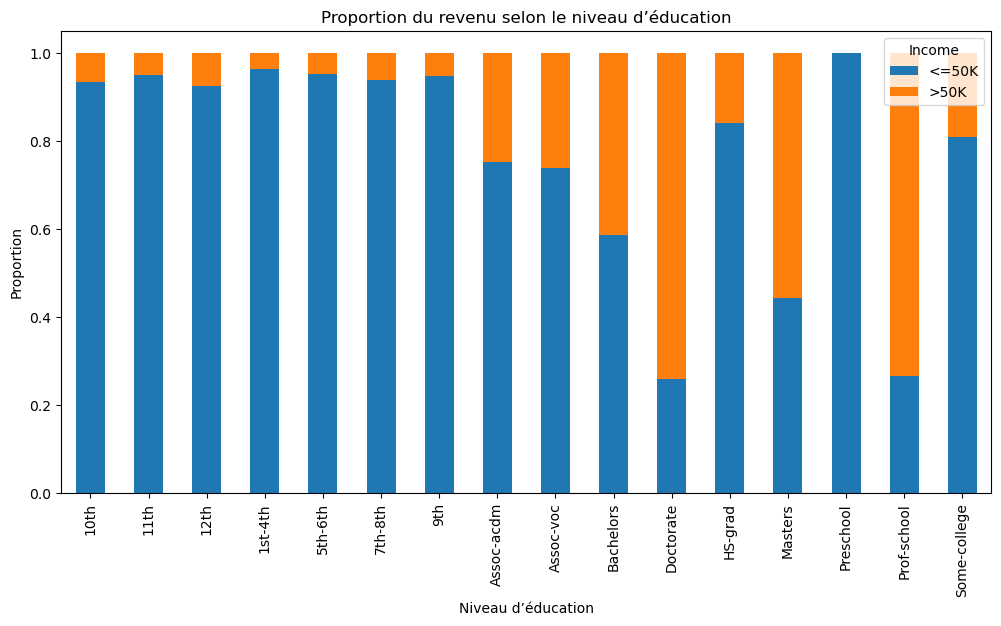

In [ ]:
edu_income = pd.crosstab(df["education"], df["income"], normalize="index")  
edu_income.sort_values(by=">50K", ascending=False).head(10)
edu_income.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Proportion du revenu selon le niveau d’éducation")
plt.ylabel("Proportion")
plt.xlabel("Niveau d’éducation")
plt.legend(title="Income")
plt.show()

### Association entre le niveau d’éducation et le revenu

On observe une association forte entre le niveau d’éducation et le revenu.
Les individus ayant un niveau d’éducation élevé (Masters, Doctorate, Prof-school)
présentent une proportion significativement plus élevée de revenus supérieurs à 50K.

Cette variable apparaît donc comme un facteur explicatif important pour la prédiction
du revenu.

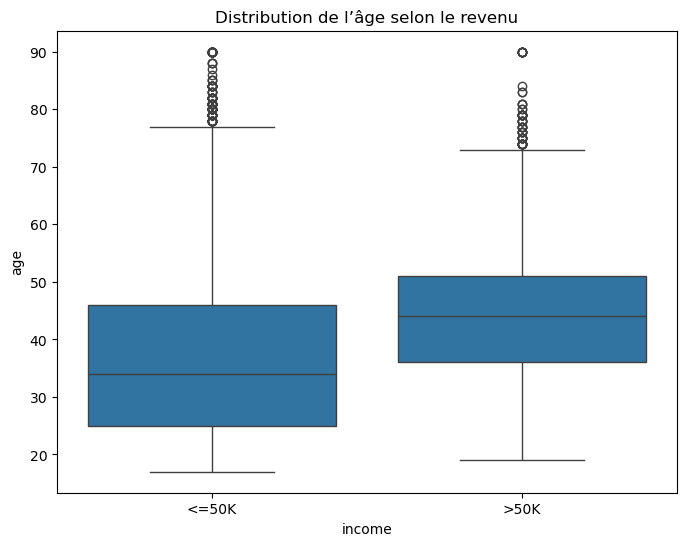

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(x="income", y="age", data=df)
plt.title("Distribution de l’âge selon le revenu")
plt.show()

### Relation entre l’âge et le revenu

La distribution de l’âge diffère entre les deux catégories de revenu.
Les individus gagnant plus de 50K ont en moyenne un âge plus élevé,
ce qui suggère que l’expérience professionnelle joue un rôle dans le niveau de revenu.

## Insights et implications pour la modélisation

L’analyse exploratoire met en évidence plusieurs éléments clés :

- Le niveau d’éducation est fortement associé au revenu, ce qui en fait
  une variable explicative majeure pour la modélisation.
- L’âge et le nombre d’heures travaillées par semaine présentent des différences
  notables selon le niveau de revenu, indiquant leur utilité potentielle
  comme variables numériques discriminantes.
- Aucune corrélation excessive n’a été observée entre les variables numériques,
  limitant les risques de multicolinéarité.
- Les variables catégorielles telles que `occupation` et `workclass`
  montrent des distributions de revenu très contrastées.

Ces observations justifient :
- l’encodage des variables catégorielles,
- la conservation des variables numériques principales,
- l’utilisation de modèles capables de gérer des relations non linéaires
  et des interactions entre variables.